In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2,
                                                "lines.markersize": 10})
from IPython.display import display, Math
from sympy import Symbol, symbols, Function, Matrix, simplify, lambdify, expand, latex
from sympy import diff, cos, sin, sqrt, acos, atan2, atan, Abs
from sympy.vector import CoordSys3D
from sympy.physics.mechanics import dynamicsymbols, mlatex, init_vprinting
init_vprinting()

In [3]:
!pip install numpy

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install sympy


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
!pip install ipython


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
G = CoordSys3D('')
t = Symbol('t')
l = Symbol('ell', real=True, positive=True)
# type \theta and press tab for the Greek letter θ:
θ = dynamicsymbols('theta', real=True)  # or Function('theta')(t)

In [11]:
r_p = l*cos(θ)*G.i + l*sin(θ)*G.j + 0*G.k
r_p

(ell⋅cos(θ)) i_ + (ell⋅sin(θ)) j_

In [12]:
r_p.components

{i_: ell⋅cos(θ), j_: ell⋅sin(θ)}

In [13]:
r = Matrix((r_p.dot(G.i), r_p.dot(G.j)))
r

⎡ell⋅cos(θ)⎤
⎢          ⎥
⎣ell⋅sin(θ)⎦

In [14]:
r_p.to_matrix(G)

⎡ell⋅cos(θ)⎤
⎢          ⎥
⎢ell⋅sin(θ)⎥
⎢          ⎥
⎣    0     ⎦

In [16]:
v = r.diff(t)
v

⎡-ell⋅sin(θ)⋅θ̇⎤
⎢             ⎥
⎣ell⋅cos(θ)⋅θ̇ ⎦

In [17]:
simplify(sqrt(v[0]**2 + v[1]**2))

       ____
      ╱  2 
ell⋅╲╱  θ̇  

In [18]:
simplify(v.norm())

       ___________________________
      ╱           2             2 
ell⋅╲╱  │sin(θ)⋅θ̇│  + │cos(θ)⋅θ̇│  

In [19]:
acc = v.diff(t, 1)
acc

⎡                            2 ⎤
⎢-ell⋅sin(θ)⋅θ̈ - ell⋅cos(θ)⋅θ̇  ⎥
⎢                              ⎥
⎢              2               ⎥
⎣- ell⋅sin(θ)⋅θ̇  + ell⋅cos(θ)⋅θ̈⎦

In [20]:
A = θ.diff(t, 2)
simplify(sqrt(expand(acc[0]).coeff(A)**2 + expand(acc[1]).coeff(A)**2))*A

ell⋅θ̈

In [21]:
A = θ.diff(t)**2
simplify(sqrt(expand(acc[0]).coeff(A)**2+expand(acc[1]).coeff(A)**2))*A

     2
ell⋅θ̇ 

In [22]:
θ_i, θ_f, d = 0, np.pi/2, 1
ts = np.arange(0.01, 1.01, .01)
mjt  = θ_i + (θ_f - θ_i)*(10*(t/d)**3 - 15*(t/d)**4 + 6*(t/d)**5)

ang  = lambdify(t, mjt, 'numpy'); ang = ang(ts)
vang = lambdify(t, mjt.diff(t,1), 'numpy'); vang = vang(ts)
aang = lambdify(t, mjt.diff(t,2), 'numpy'); aang = aang(ts)
jang = lambdify(t, mjt.diff(t,3), 'numpy'); jang = jang(ts)

b, c, d, e = symbols('b c d e')
dicti = {l:1, θ:b, θ.diff(t, 1):c, θ.diff(t, 2):d, θ.diff(t, 3):e}

r2 = r.subs(dicti);
rxfu = lambdify(b, r2[0], modules = 'numpy')
ryfu = lambdify(b, r2[1], modules = 'numpy')

v2 = v.subs(dicti);
vxfu = lambdify((b, c), v2[0], modules = 'numpy')
vyfu = lambdify((b, c), v2[1], modules = 'numpy')

acc2 = acc.subs(dicti);
axfu = lambdify((b, c, d), acc2[0], modules = 'numpy')
ayfu = lambdify((b, c, d), acc2[1], modules = 'numpy')

jerk = r.diff(t,3)
jerk2 = jerk.subs(dicti);
jxfu = lambdify((b, c, d, e), jerk2[0], modules = 'numpy')
jyfu = lambdify((b, c, d, e), jerk2[1], modules = 'numpy')

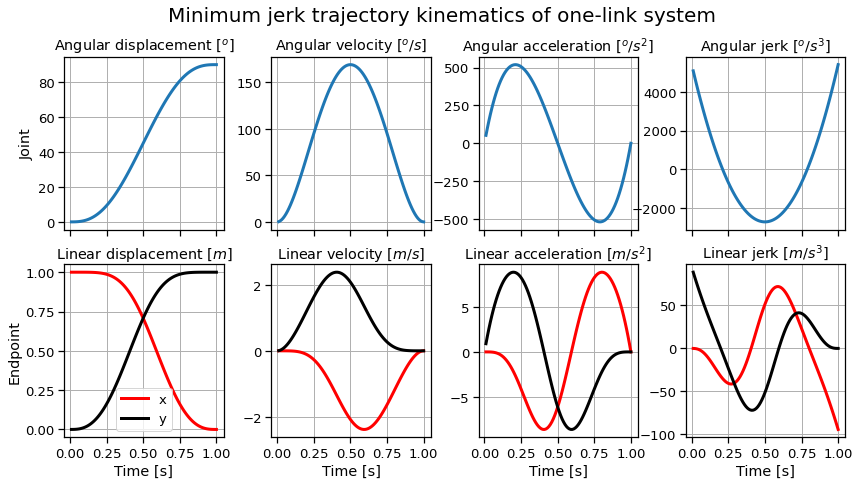

In [23]:
fig, hax = plt.subplots(2, 4, sharex = True, figsize=(14, 7))

hax[0, 0].plot(ts, ang*180/np.pi, linewidth=3)
hax[0, 0].set_title('Angular displacement [$^o$]');
hax[0, 0].set_ylabel('Joint')

hax[0, 1].plot(ts, vang*180/np.pi, linewidth=3)
hax[0, 1].set_title('Angular velocity [$^o/s$]');

hax[0, 2].plot(ts, aang*180/np.pi, linewidth=3)
hax[0, 2].set_title('Angular acceleration [$^o/s^2$]');

hax[0, 3].plot(ts, jang*180/np.pi, linewidth=3)
hax[0, 3].set_title('Angular jerk [$^o/s^3$]');

hax[1, 0].plot(ts, rxfu(ang), 'r', linewidth=3, label = 'x')
hax[1, 0].plot(ts, ryfu(ang), 'k', linewidth=3, label = 'y')
hax[1, 0].set_title('Linear displacement [$m$]');
hax[1, 0].legend(loc='best').get_frame().set_alpha(0.8)
hax[1, 0].set_ylabel('Endpoint')

hax[1, 1].plot(ts,vxfu(ang, vang), 'r', linewidth=3)
hax[1, 1].plot(ts,vyfu(ang, vang), 'k', linewidth=3)
hax[1, 1].set_title('Linear velocity [$m/s$]');

hax[1, 2].plot(ts,axfu(ang, vang, aang), 'r', linewidth=3)
hax[1, 2].plot(ts,ayfu(ang, vang, aang), 'k', linewidth=3)
hax[1, 2].set_title('Linear acceleration [$m/s^2$]');

hax[1, 3].plot(ts, jxfu(ang, vang, aang, jang), 'r', linewidth=3)
hax[1, 3].plot(ts, jyfu(ang, vang, aang, jang), 'k', linewidth=3)
hax[1, 3].set_title('Linear jerk [$m/s^3$]');

fig.suptitle('Minimum jerk trajectory kinematics of one-link system', fontsize=20);
for i, hax2 in enumerate(hax.flat):
        hax2.locator_params(nbins=5)
        hax2.grid(True)
        if i > 3:
            hax2.set_xlabel('Time [s]');
plt.subplots_adjust(hspace=0.2, wspace=.3) #plt.tight_layout()

In [25]:
J = r.diff(θ)
J

⎡-ell⋅sin(θ)⎤
⎢           ⎥
⎣ell⋅cos(θ) ⎦